# Sensitivity one point following Perkins calculation 

In [2]:
import numpy as np
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [4]:
# paramters
Sup = 3
E_test = 4.7 * 10**(9)                                                               # GeV = ongeveer 1 * 10**9.67
N_a = 6.022 * 10**(23)
rho = 1                                                                              # g cm^-3
Vbox = [1 * 10**(15), 4 * 10**(15), 9 * 10**(15), 16 * 10**(15), 25 * 10**(15)]      # cm^3
Veff = [1 * 10**(15), 4 * 10**(15), 8 * 10**(15), 13 * 10**(15), 16.5 * 10**(15)]    # cm^3
cross = 10**(-31.9)                                                                  # cm^2
T = 365*24*3600                                                                      # s
Vbox_i = 4 * 10**(15)                                                                # cm^3
fraction = 0.7437
molar_mass = 18.01528                                                                # g mol^-1
mol_constant = 1/molar_mass                                                          # mol g^-1

lambda_E = []

lam = cross * rho * N_a * Vbox_i * 2 * np.pi * T * fraction * mol_constant           # cm^2 s

phi = Sup / (E_test * lam)                                                           # GeV^-1 cm^-2 s^-1

phi_E2 = E_test**2 * phi                                                             # GeV^1 cm^-2 s^-1
a = "{:.3e}".format(phi_E2)

print(a)

5.684e-05


In [8]:
# Read of values for the graph 5.18
E_Perkin = [10**(11.35), 10**(11.75), 10**(11.9), 10**(12.2), 10**(12.4), 10**(12.6), 10**(12.9), 10**(13.2), 10**(13.45), 10**(13.95), 10**(15), 10**(15.85)]
Phi_Perkin = [10**(-5.45), 10**(-5.85), 10**(-6), 10**(-6.2), 10**(-6.3), 10**(-6.4), 10**(-6.35), 10**(-6.2), 10**(-6.1), 10**(-5.8), 10**(-5.1), 10**(-4.5)]

Phi_Perkin5 = [10**(-8.5), 10**(-8.7), 10**(-8.6), 10**(-8.5), 10**(-8.3), 10**(-8), 10**(-7.7), 10**(-7.4), 10**(-7.2), 10**(-6.8), 10**(-6.5), 10**(-6.2)]
E_Perkin5 = [10**(10.5), 10**(11), 10**(11.5), 10**(12), 10**(12.5), 10**(13), 10**(13.5), 10**(14), 10**(14.5), 10**(15), 10**(15.5), 10**(16)]

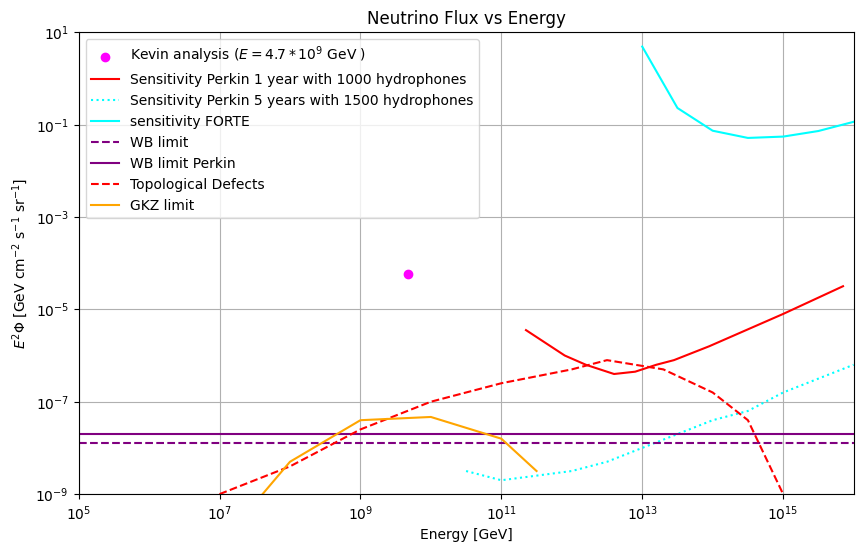

In [28]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(E_test, phi_E2, color="magenta", label="Kevin analysis ($E = 4.7*10^9$ GeV )")
plt.loglog(E_Perkin, Phi_Perkin, color="red", label="Sensitivity Perkin 1 year with 1000 hydrophones")
plt.loglog(E_Perkin5, Phi_Perkin5, color="cyan", linestyle='dotted', label="Sensitivity Perkin 5 years with 1500 hydrophones")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')

################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.9), label="WB limit", color="purple", linestyle='dashed')
plt.axhline(10**(-7.7), label="WB limit Perkin", color="purple")

################################################################################################################################
# add the topological defects
Top_E = [10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(12), 10**(12.5), 10**(13.3), 10**(14), 10**(14.5), 10**(15)]
Top_flux_E = [10**(-9), 10**(-8.4), 10**(-7.6), 10**(-7), 10**(-6.6), 10**(-6.3), 10**(-6.1), 10**(-6.3), 10**(-6.8), 10**(-7.4), 10**(-9)]
plt.loglog(Top_E, Top_flux_E, label='Topological Defects', linestyle='dashed', color='red')

################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(11.5)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8), 10**(-20)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
plt.loglog(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')

################################################################################################################################

plt.title('Neutrino Flux vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**(5), 10**(16))
plt.ylim(10**(-9), 10**(1))
plt.legend()
plt.grid(True)
plt.show()

### Test one of the points from the Perkin paper which shows that the calculation is correct:

In [123]:
# Parameters from graph 5.12 from Perkin
E_test2 = [10**(10.4), 10**(11.105), 10**(11.9), 10**(12.7), 10**(13.5), 10**(14.3), 10**(15.1)]             # GeV
Vbox_km = [1, 10**(1.2), 10**(2.4), 10**(3.05), 10**(3.05), 10**(3.05), 10**(3.05)]                          # km^3                                              
cross = [10**(-31.4), 10**(-31.1), 10**(-30.8), 10**(-30.5), 10**(-30.2), 10**(-29.9), 10**(-29.6)]          # cm^2

# parameters
Sup = 3
N_a = 6.022 * 10**(23)                                                               # mol^-1
rho = 1                                                                              # g cm^-3
T = 365*24*3600                                                                      # s
Vbox_i = [i * 10**(15) for i in Vbox_km]                                             # cm^3
molar_mass = 18.01528                                                                # g mol^-1
mol_constant = 1 / molar_mass                                                        # mol g^-1
Vcan = np.pi * 48**2 * 4                                                             # km^3
Vcan_cm = Vcan * 10**(15)                                                            # cm^3

fraction = [0.00501187233, 0.05011872336, 0.19952623149, 0.79432823472, 0.9, 1, 1, 1]

# Calculate the lambda below

# Calculate the sensitivity for the above energies
sensitivities = []

for i in range(0, len(E_test2)):
    energy = E_test2[i]
    lam = cross[i] * rho * N_a * Vcan_cm * fraction[i] * 2 * np.pi * T  * mol_constant             # cm^2 s sr
    phi = Sup / (energy * lam)                                                       # GeV^-1 cm^-2 s^-1 sr^-1
    phi_E22 = energy**2 * phi                                                        # GeV^1 cm^-2 s^-1 sr^-1
    a = "{:.3e}".format(phi_E22)
    sensitivities.append(phi_E22)

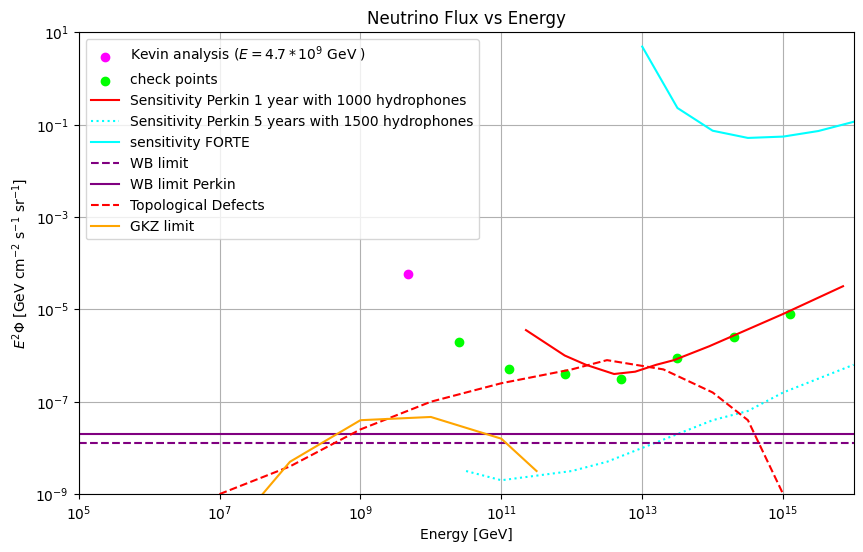

In [125]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(E_test, phi_E2, color="magenta", label="Kevin analysis ($E = 4.7*10^9$ GeV )")
plt.scatter(E_test2, sensitivities, color="lime", label="check points")

plt.loglog(E_Perkin, Phi_Perkin, color="red", label="Sensitivity Perkin 1 year with 1000 hydrophones")
plt.loglog(E_Perkin5, Phi_Perkin5, color="cyan", linestyle='dotted', label="Sensitivity Perkin 5 years with 1500 hydrophones")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')

################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.9), label="WB limit", color="purple", linestyle='dashed')
plt.axhline(10**(-7.7), label="WB limit Perkin", color="purple")

################################################################################################################################
# add the topological defects
Top_E = [10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(12), 10**(12.5), 10**(13.3), 10**(14), 10**(14.5), 10**(15)]
Top_flux_E = [10**(-9), 10**(-8.4), 10**(-7.6), 10**(-7), 10**(-6.6), 10**(-6.3), 10**(-6.1), 10**(-6.3), 10**(-6.8), 10**(-7.4), 10**(-9)]
plt.loglog(Top_E, Top_flux_E, label='Topological Defects', linestyle='dashed', color='red')

################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(11.5)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8), 10**(-20)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
plt.loglog(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')

################################################################################################################################

plt.title('Neutrino Flux vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**(5), 10**(16))
plt.ylim(10**(-9), 10**(1))
plt.legend()
plt.grid(True)
plt.show()

In [95]:
print(Vcan_cm)

2.8952917895483535e+19


In [96]:
print(Vbox_i)

[1000000000000000, 1.5848931924611132e+16, 2.5118864315095798e+17, 1.122018454301963e+18, 1.122018454301963e+18, 1.122018454301963e+18, 1.122018454301963e+18]


In [120]:
pizza = [i * j for i, j in zip(Vbox_i, fraction)]

print(pizza)

[5011872330000.0, 794328234681057.6, 5.011872336099705e+16, 8.912509381289413e+17, 1.0098166088717668e+18, 1.122018454301963e+18, 1.122018454301963e+18]
